# Question 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1D FFT

In [2]:
def FFT_1D(x):
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    if N <= 1:
        return x
    else:
        X_even = FFT_1D(x[::2])
        X_odd = FFT_1D(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd, X_even + factor[N // 2:] * X_odd])

## 2D FFT

In [3]:
def FFT_2D(x):
    res = np.asarray(x,dtype = complex)
    for i in range(res.shape[0]):
        res[i] = FFT_1D(res[i])
    res = res.T
    for i in range(res.shape[0]):
        res[i] = FFT_1D(res[i])        
    return res.T

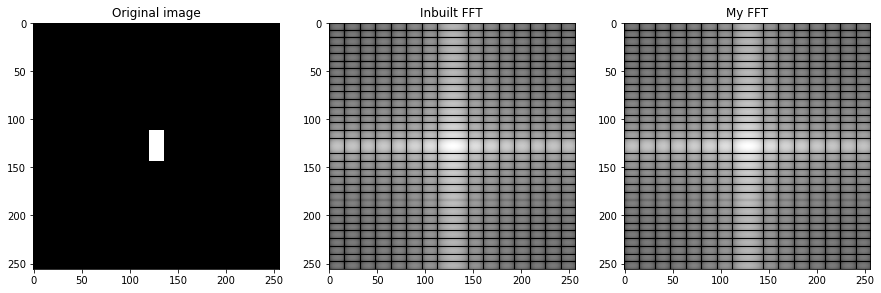

In [4]:
img = cv2.imread('./res/rectangle.jpg', 0)

out1 = np.log(1 + np.abs(np.fft.fftshift(np.fft.fft2(img))))
out2 = np.log(1 + np.abs(np.fft.fftshift(FFT_2D(img))))
arr = plt.subplots(1,3,figsize =(15,15))[1]
arr[0].imshow(np.uint8(img), 'gray')
arr[0].set_title("Original image")
arr[1].imshow(out1, 'gray')
arr[1].set_title("Inbuilt FFT")
arr[2].imshow(out2, 'gray')
arr[2].set_title("My FFT")
plt.show()

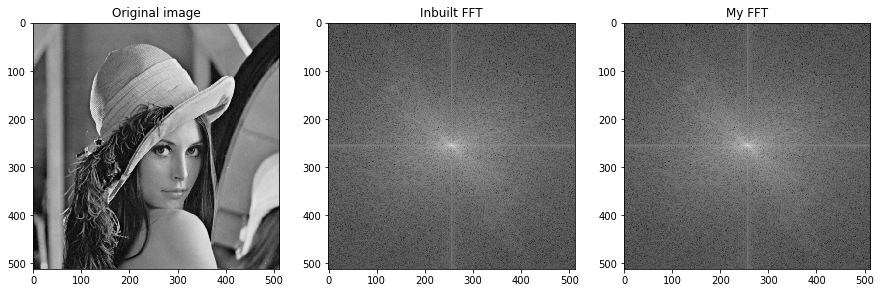

In [5]:
img = cv2.imread('./res/lena.jpg', 0)

out1 = np.log(1 + np.abs(np.fft.fftshift(np.fft.fft2(img))))
out2 = np.log(1 + np.abs(np.fft.fftshift(FFT_2D(img))))
arr = plt.subplots(1,3,figsize =(15,15))[1]
arr[0].imshow(np.uint8(img), 'gray')
arr[0].set_title("Original image")
arr[1].imshow(out1, 'gray')
arr[1].set_title("Inbuilt FFT")
arr[2].imshow(out2, 'gray')
arr[2].set_title("My FFT")
plt.show()